# ロジスティック関数とロジット関数の関係：逆関数である

ある実数$z$を0~1の範囲に圧縮するのがロジスティック関数（シグモイド関数）。

そこで得られる結果$p$を確率と捉えた場合、確率$p$を＄-\infty$～$\infty$の範囲にマッピングして実数$z$を求めるのがロジット関数。

この実数$z$をロジスティック関数に渡せば、それは当然確率$p$を返す。その様子を図示すると以下のようになる。


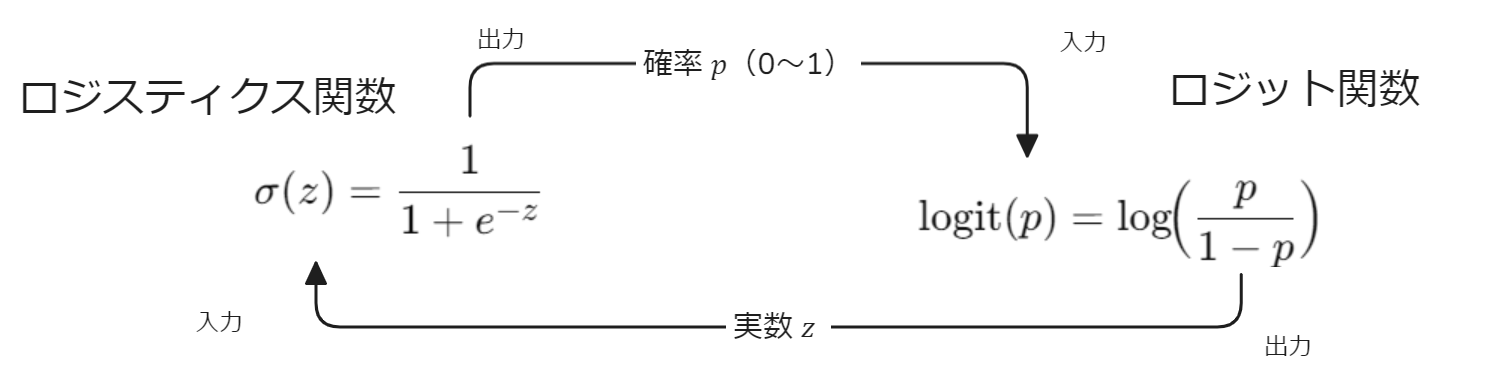

## ロジスティック関数とロジット関数を個別に可視化

それぞれの特徴については別のページを参照してください。

https://github.com/yoshiwatanabe/python-test/blob/main/math/logistic_function.ipynb

https://github.com/yoshiwatanabe/python-test/blob/main/math/logit_function.ipynb

ロジスティック関数とロジット関数のグラフをそれぞれ可視化します。

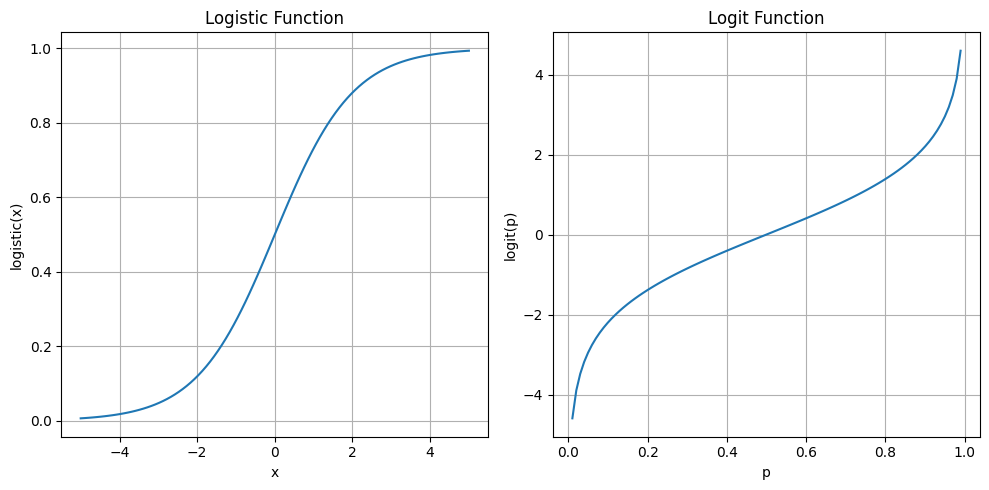

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ロジスティック関数
def logistic(x):
  return 1 / (1 + np.exp(-x))

# ロジット関数
def logit(p):
  return np.log(p / (1 - p))

# x軸の定義（ロジスティック関数の入力）
x = np.linspace(-5, 5, 100)
# y軸の定義（ロジット関数の入力）
p = np.linspace(0.01, 0.99, 100) # 0と1に近い値は避ける（logit関数が発散するため）


# ロジスティック関数のグラフ
plt.figure(figsize=(10, 5))  # 図のサイズを指定
plt.subplot(1, 2, 1)  # 1行2列のグラフの1つ目の位置にプロット
plt.plot(x, logistic(x))
plt.title("Logistic Function")
plt.xlabel("x")
plt.ylabel("logistic(x)")
plt.grid(True)  # グリッドを表示

# ロジット関数のグラフ
plt.subplot(1, 2, 2)  # 1行2列のグラフの2つ目の位置にプロット
plt.plot(p, logit(p))
plt.title("Logit Function")
plt.xlabel("p")
plt.ylabel("logit(p)")
plt.grid(True)  # グリッドを表示

plt.tight_layout()  # グラフが重ならないように調整


**ロジスティクス関数**は実数$x$（横軸）を0~1の範囲の値（縦軸）にマッピングします。注目ポイントとは$x=0$の時$\frac{1}{2}$なので$0.5$になります。$x < 0$では値が小さいほど$0$になります（他方、$x > 0$では値が大きいほど$1$に近づきます。

**ロジット関数**は0~1の範囲の値（縦軸）- 確率$p$ - を$-\infty$～$\infty$の範囲の値にマッピングします。$p$が$0.5$つまり確率で「半々」の時、まずオッズは$\frac{0.5}{1-0.5}$で$1$になり、その自然対数がロジットなので$ln(1) = 0$となります。$p < 0.5$では$0$に近づくほど$-\infty$に近づきます（他方、$p > 0.5$では$1$に近づくほど$\infty$に近づきます。

# 逆関数の関係

次にロジスティック関数とロジット関数が逆関数の関係になっていることを可視化するグラフを、二つのグラフを重ね合わせて描画させます。

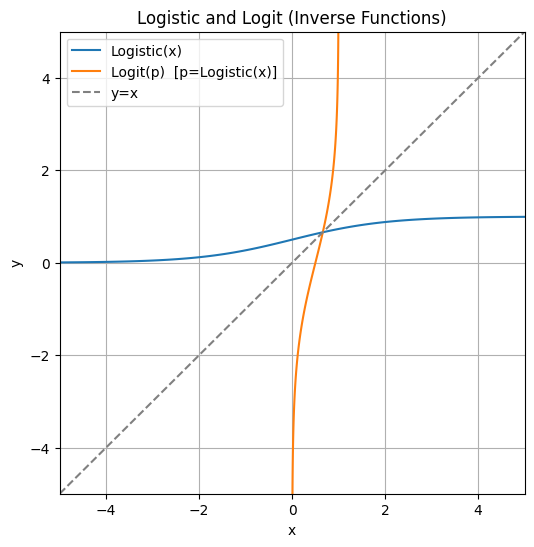

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ロジスティック関数
def logistic(x):
  return 1 / (1 + np.exp(-x))

# ロジット関数
def logit(p):
  return np.log(p / (1 - p))

# x軸の定義（ロジスティック関数の入力）
x = np.linspace(-5, 5, 100)
# y軸の定義（ロジット関数の入力）
p = np.linspace(0.01, 0.99, 100) # 0と1に近い値は避ける（logit関数が発散するため）

# 逆関数の関係を示すグラフ
x2 = np.linspace(-5, 5, 100)
plt.figure(figsize=(6, 6))
plt.plot(x2, logistic(x2), label="Logistic(x)")
plt.plot(logistic(x2), x2, label="Logit(p)  [p=Logistic(x)]") # ロジスティック関数の出力をロジット関数に入力
plt.plot(x2, x2, linestyle='--', color='gray', label="y=x") # y=xの線を追加
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logistic and Logit (Inverse Functions)")
plt.legend()
plt.grid(True)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()


青い曲線はロジスティック関数の典型的な「S字カーブ」を表しています。ロジスティック関数の出力は０～１に圧縮されるので縦軸で$y \approx 0$から$y \approx 1$の間に結果があります。

オレンジ色の曲線は横軸の$x$の値の範囲が$y \approx 0$から$y \approx 1$だということが分かります。なぜならロジット関数は確率のような0~1の値を取るからです。

青い曲線（ロジスティック関数）とオレンジ色の曲線（ロジット関数）が逆関数であることは、例えば$y = x$の直線を「軸」として立体的に回転したらもう片方と重ねあうことからも分かります（もしくは「折り紙」に見立てて点線で折る、でもその対称性がわかります）

具体的な点で言うと、ロジスティック関数で$x=0$の時、$logistic(0) = 1 / (1 + exp(0)) = 1 / (1 + 1) = 0.5$となり座標$(0, 0.5)$を通ります。この$0.5$をロジット関数に渡すと $logit(0.5) = log(0.5 / (1 - 0.5)) = log(0.5 / 0.5) = log(1) = 0$ となり座標$(0.5,0)$ を通ります。

最後に、逆関数であることを確認するために、$logit(logistic(x)$という合成関数に$x$を渡した結果が同じ$x$の値になることを確認します。同じ結果なので$y=x$の直線になるはずです。

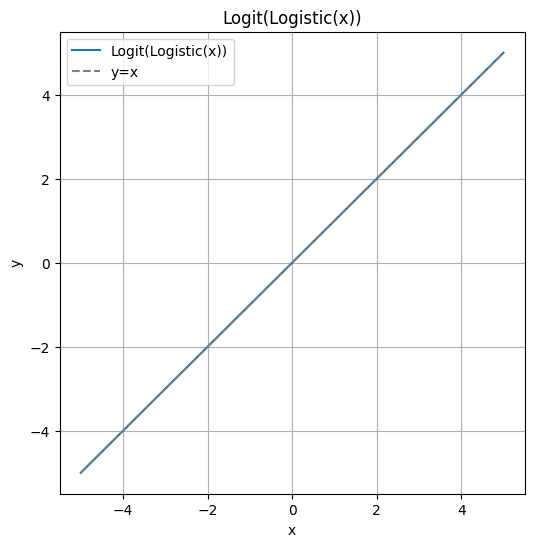

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# ロジスティック関数
def logistic(x):
  return 1 / (1 + np.exp(-x))

# ロジット関数
def logit(p):
  return np.log(p / (1 - p))

# x軸の定義（ロジスティック関数の入力）
x = np.linspace(-5, 5, 100)
# y軸の定義（ロジット関数の入力）
p = np.linspace(0.01, 0.99, 100) # 0と1に近い値は避ける（logit関数が発散するため）

# もう一つの例：ロジスティック関数とロジット関数の合成関数
x3 = np.linspace(-5, 5, 100)
plt.figure(figsize=(6, 6))
plt.plot(x3, logit(logistic(x3)), label="Logit(Logistic(x))")
plt.plot(x3, x3, linestyle='--', color='gray', label="y=x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Logit(Logistic(x))")
plt.legend()
plt.grid(True)
plt.show()

ロジスティック関数とロジット関数の合成関数は同じ値を返すことが確認できました。

## ロジスティクス関数とロジット関数と「ロジスティック回帰」

ここまでロジスティック関数とロジット関数が逆関数の関係であることを確認しました。

そして、その関係を「ロジスティック回帰」と、その文脈で使われる「線形結合」との関係を下図で示します。

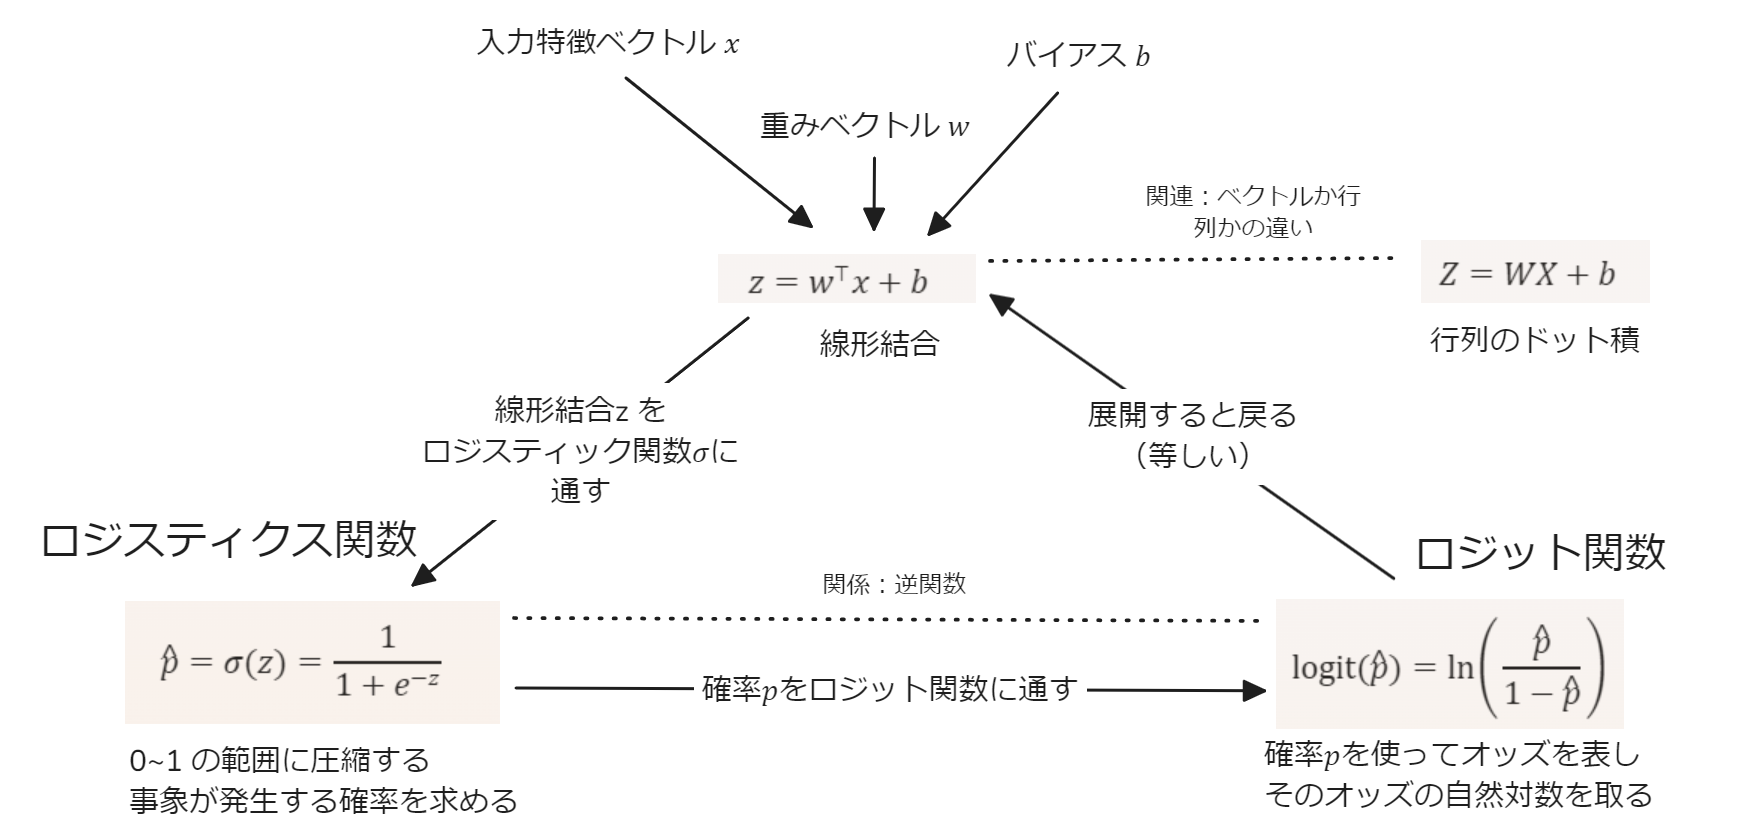

ここで重要なのは「線形結合」と「ロジット関数」が等価であるということです。これによって「確率空間」と「線形空間」のいずれでもロジスティック回帰を扱うことが出来るようになります。